In [10]:
%pip install seaborn -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
)
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Dataset/student_performance_cleaned.csv")
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].map({"Yes": 1, "No": 0})
df = df.replace({"Yes": 1, "No": 0}).infer_objects(copy=False)
df["Engagement_Score"] = df["Attendance Rate"] * (1 + df["Participation in Extracurricular Activities"])
df["Study_Efficiency"] = df["Previous Grades"] / (df["Study Hours per Week"] + 0.001)
df["Consistency"] = (df["Attendance Rate"] + df["Previous Grades"]) / 2
df["Time_Tradeoff"] = df["Study Hours per Week"] * (1 - df["Attendance Rate"])
X = df.drop(columns=["Student ID", "Passed"])
y = df["Passed"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(y_train.value_counts())


Dataset loaded successfully!
Shape: (30986, 6)
Training samples: 24788, Testing samples: 6198
Passed
0    12406
1    12382
Name: count, dtype: int64


We started with Logistic Regression because it is simple, fast, and easy to interpret. It helps us understand how each feature affects the prediction and provides a clear baseline for comparison. If the data has mostly linear relationships, Logistic Regression can perform well.

In [12]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]
print("=== Logistic Regression Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.3f}")

=== Logistic Regression Evaluation ===
Accuracy : 0.486
Precision: 0.483
Recall   : 0.424
F1 Score : 0.452
ROC-AUC  : 0.489


Random Forest was chosen because it can handle more complex patterns and non-linear relationships in the data. It builds many decision trees and combines their results, which usually improves accuracy and reduces overfitting. Since student performance can depend on several interacting factors (like study hours, attendance, and grades), Random Forest is a strong choice.

In [13]:
#  Model 2: Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("=== Random Forest Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob_rf):.3f}")

=== Random Forest Evaluation ===
Accuracy : 0.505
Precision: 0.504
Recall   : 0.522
F1 Score : 0.513
ROC-AUC  : 0.503


Extra Trees is similar to Random Forest but introduces more randomness when splitting nodes, which can make it faster and less sensitive to small data changes. We used it to see if this extra randomness could improve prediction stability and accuracy.

In [14]:
# Model 3: Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
y_prob_et = et.predict_proba(X_test)[:, 1]

print("=== Extra Trees Evaluation ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_et):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_et):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_et):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred_et):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob_et):.3f}")


=== Extra Trees Evaluation ===
Accuracy : 0.494
Precision: 0.494
Recall   : 0.506
F1 Score : 0.500
ROC-AUC  : 0.494


=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.485641,0.483076,0.424096,0.451668
1,Random Forest,0.504840,0.504215,0.521641,0.512780
2,Extra Trees,0.493869,0.493539,0.505814,0.499601


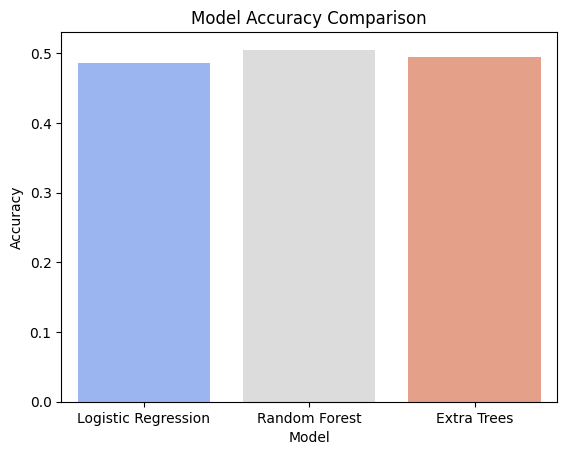

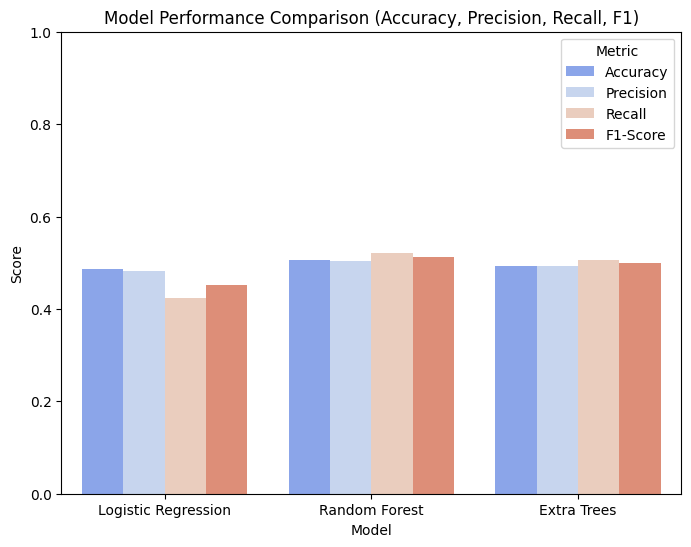

In [15]:
# Model Performance Comparison and Visualization
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Extra Trees"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_et),
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_et),
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_et),
    ],
    "F1-Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_et),
    ]
})
print("=== Model Performance Comparison ===")
display(results)
sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.show()

results_melted = results.melt(id_vars="Model", 
                              value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                              var_name="Metric", value_name="Score")

plt.figure(figsize=(8,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted, palette="coolwarm")
plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1)")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()

Our approach to supervised learning included experimenting with 3 models: Logistic Regression, Random Forest and Extra Trees. Our models achieved accuracy scores ranging from 48.6% to 50.5%, which is as good as random guessing on a binary classification problem. After analyzing the results, we realized the low accuracy could be a consequence of the weak features avaliable in the dataset as they do not fully capture the complexity of what determines whether a student passes or fails. Student success depends on so many other factors such as consistency, actual engagement and personal motivation.

To address this challenge, we attempted multiple ways to improve model performance.

Firstly, we experimented with feature engineering, in which we created 4 features: Engagement_Score, Study_Efficiency, Consistency, and Time_Tradeoff. These features helped slightly in increasing the accuracy and other metrics, but did not create a dramatic improvement.

Secondly, we tuned different parameters. For the Random Forest model, we increased 'n_estimators' from the default 100 to 500 to give the model more trees to learn patterns. We set 'max_depth = 15' (a moderate depth) to allow the trees to capture complex patterns without overfitting. We also set 'min_samples_split = 4' and 'min_samples_leaf = 2' to control how the tree splits. Since our dataset has roughly equal numbers of passing and failing students, we set class_weight = 'balanced_subsample' to ensure the model treats both classes equally. For Logistic Regression, we increased max_iter = 1000 to ensure the optimization algorithm had enough iterations to fully converge. For Extra Trees, we used similar hyperparameters to Random Forest but with class_weight = 'balanced' instead of 'balanced_subsample', which applies the balancing differently.

To further improve the performance, we could test different weight ratios and add more advanced feature engineering. More advanced approaches that we could explore would include using systematic hyperparameter optimization such as GridSearchCV, to automatically test combinations of parameter instead of manually entering values. Furthermore, we could experiment with gradient boosting models that may outperform random forest by building trees sequentially and learning from previous mistakes.

To conclude, out of the 3 models, Random Forest performed best with an accuracy of 50.5% and 52.2% recall, meaning it correctly identified about half of the students who actually passed. The hyperparameter tuning (the balanced class weighting and depth/split changes) helped it avoid overfitting while still learning useful patterns. Extra Trees performed between Logistic Regression and Random Forest, which makes sense given its design. The moderate performance (49.4% accuracy, 50.6% recall) suggests it was making reasonable predictions but not capturing patterns as well as Random Forest's more deliberate split selection. With the suggested future improvements, we could potentially increase the metrics a few points higher, however, limitation is the data itself.